In [21]:
from __future__ import print_function, division
%pylab notebook
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from bokeh.plotting import *

from bokeh.io import output_notebook
output_notebook()
from collections import Counter
from operator import itemgetter

from termcolor import colored
import os

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


Loading BokehJS ...

In [30]:
df = pd.read_pickle('clf.df')
course_desc = pd.read_csv('udacity_courses.csv', index_col='id')
course_desc.head(2)

,title,homepage,subtitle,level,starter,image,banner_image,teaser_video,summary,short_summary,required_knowledge,expected_learning,featured,syllabus,faq,full_course_available,expected_duration,expected_duration_unit,new_release
id,,,,,,,,,,,,,,,,,,,
bio110,Tales from the Genome,https://www.udacity.com/course/tales-from-the-...,Introduction to Genetics for Beginners,beginner,False,https://lh5.ggpht.com/Fh07_XbT61CGDWsQoOMQaIeH...,https://lh4.ggpht.com/_AHqr0EXcLBzF0rrwtBagE0t...,https://www.youtube.com/watch?v=sEXrjh-tme8,This course is a journey into the biology of t...,"Learn the basics of genetics, with a personal ...",No previous experience in genetics is necessar...,You will learn about fundamental principles of...,False,## Lesson 1: Introduction to traits and heredi...,NaN,False,3,months,False
cs046,Intro to Java Programming,https://www.udacity.com/course/intro-to-java-p...,Building Programs with Classes & Objects,beginner,False,https://lh4.ggpht.com/9ytiUdz0QYHwuMJFTXcNXZn4...,https://lh3.ggpht.com/AdAALPYhCsWuIvDl0ZY6zIW2...,https://www.youtube.com/watch?v=Wsp5Rrenoq4,"In this introductory course, you'll learn and ...",Learn essential computer science and object-or...,No prior programming experience and knowledge ...,Java is one of the most popular programming la...,False,"### Lesson 1: Introduction to Computers, Progr...",NaN,True,4,months,False


In [31]:
print(df.columns)
df.head(2)

Index([u'idx', u'jdx', u'vec-diff', u'cos-sim', u'euc-dist', u'man-dist',
       u'bin_diff', u'max_diff', u'mean_diff', u'median_diff', u'v1_max',
       u'v2_max', u'v1_min', u'v2_min', u'v1_mean', u'v2_mean', u'v1_median',
       u'v2_median', u'v1_count', u'v2_count', u'v1_n_chars', u'v1_n_words',
       u'v2_n_chars', u'v2_n_words', u'v1_flesch', u'v2_flesch', u'v1', u'v2',
       u'title->title', u'title->transcript', u'title->summary',
       u'transcript->title', u'transcript->transcript', u'transcript->summary',
       u'summary->title', u'summary->transcript', u'summary->summary', u'c1',
       u'c2', u'c_id', u'prereq_id', u'ground-truth'],
      dtype='object')


,idx,jdx,vec-diff,cos-sim,euc-dist,man-dist,bin_diff,max_diff,mean_diff,median_diff,...,transcript->transcript,transcript->summary,summary->title,summary->transcript,summary->summary,c1,c2,c_id,prereq_id,ground-truth
16553,128,41,12.967658,0.000536,1.413834,16.221038,1393,0.406783,0.002627,0.0,...,90881,8,0,67899,7,learn backbonejs,advanced operating systems,ud990,ud189,False
16606,128,94,12.953045,0.001331,1.413272,16.198882,1173,0.552750,0.002624,0.0,...,40137,12,0,31071,6,learn backbonejs,software architecture design,ud990,ud821,False


In [32]:
df = df[df['idx'] != df['jdx']]
df.columns

Index([u'idx', u'jdx', u'vec-diff', u'cos-sim', u'euc-dist', u'man-dist',
       u'bin_diff', u'max_diff', u'mean_diff', u'median_diff', u'v1_max',
       u'v2_max', u'v1_min', u'v2_min', u'v1_mean', u'v2_mean', u'v1_median',
       u'v2_median', u'v1_count', u'v2_count', u'v1_n_chars', u'v1_n_words',
       u'v2_n_chars', u'v2_n_words', u'v1_flesch', u'v2_flesch', u'v1', u'v2',
       u'title->title', u'title->transcript', u'title->summary',
       u'transcript->title', u'transcript->transcript', u'transcript->summary',
       u'summary->title', u'summary->transcript', u'summary->summary', u'c1',
       u'c2', u'c_id', u'prereq_id', u'ground-truth'],
      dtype='object')

In [33]:
features = [u'vec-diff', u'cos-sim', u'euc-dist', u'man-dist',
       u'bin_diff', u'max_diff', u'mean_diff', u'median_diff', u'v1_max',
       u'v2_max', u'v1_min', u'v2_min', u'v1_mean', u'v2_mean', u'v1_median',
       u'v2_median', u'v1_count', u'v2_count', u'v1_n_chars', u'v1_n_words',
       u'v2_n_chars', u'v2_n_words', u'v1_flesch', u'v2_flesch',
       u'title->title', u'title->transcript', u'title->summary',
       u'transcript->title', u'transcript->transcript', u'transcript->summary',
       u'summary->title', u'summary->transcript', u'summary->summary']
target = 'ground-truth'
print(features)
print(target)
print('unused:', set(df.columns) - set(features) - set([target]))

[u'vec-diff', u'cos-sim', u'euc-dist', u'man-dist', u'bin_diff', u'max_diff', u'mean_diff', u'median_diff', u'v1_max', u'v2_max', u'v1_min', u'v2_min', u'v1_mean', u'v2_mean', u'v1_median', u'v2_median', u'v1_count', u'v2_count', u'v1_n_chars', u'v1_n_words', u'v2_n_chars', u'v2_n_words', u'v1_flesch', u'v2_flesch', u'title->title', u'title->transcript', u'title->summary', u'transcript->title', u'transcript->transcript', u'transcript->summary', u'summary->title', u'summary->transcript', u'summary->summary']
ground-truth
unused: set(['c_id', 'idx', 'prereq_id', 'v1', 'v2', 'jdx', 'c2', 'c1'])


In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import StratifiedShuffleSplit, StratifiedKFold
import random
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, roc_auc_score
from tqdm import tqdm
import seaborn as sns
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.metrics import accuracy_score
import copy
import joblib
from sklearn.manifold import TSNE

In [35]:
pos_idx = df[df[target]==1].index.tolist()
neg_idx = df[df[target]==0].index.tolist()
random.shuffle(neg_idx)
neg_idx = neg_idx[:len(pos_idx)*2]
df = df.loc[pos_idx + neg_idx]

In [42]:
tsne = TSNE(n_components=2)
df['x'] = 0
df['y'] = 0
df[['x', 'y']] = tsne.fit_transform(df[features])

<IPython.core.display.Javascript object>


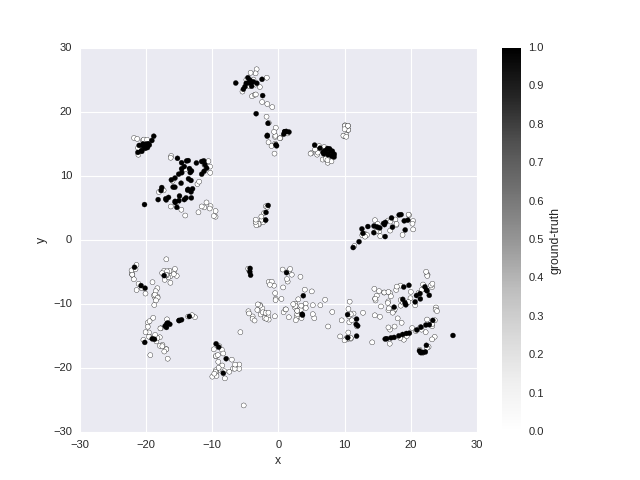

In [43]:
df.sort_values(by=target, ascending=True).plot(kind='scatter', x='x', y='y', c=target)
plt.show()

In [1]:
from mpl_toolkits.mplot3d import Axes3D

In [44]:
tsne = TSNE(n_components=3)
df['x'] = 0
df['y'] = 0
df['z'] = 0
df[['x', 'y', 'z']] = tsne.fit_transform(df[features])

<IPython.core.display.Javascript object>


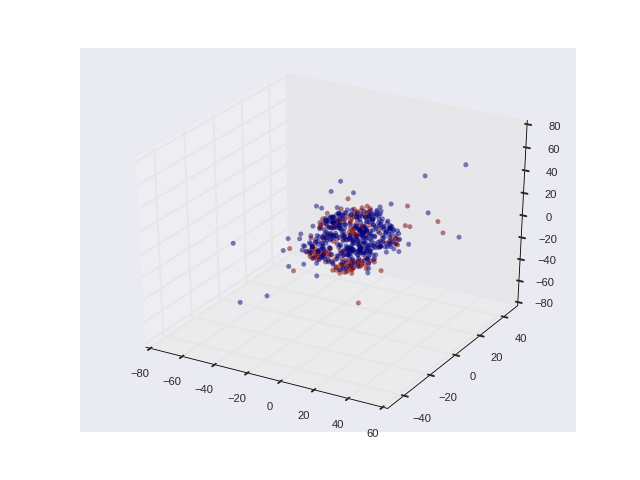

In [45]:
threedee = plt.figure().gca(projection='3d')

threedee.scatter(df['x'], df['y'], df['z'], c=df[target], alpha=0.5, lw=0, cmap='jet')
plt.show()